# 10_R : 시장 바구니 분석

* 코난아카데미 : 데이터분석 기초
* 작성자 : 김무성

# 차례

* 식료품 가게 데이터에 대한 시장바구니 분석
    - 상황
    - 분석 목표
    - 데이터 생성 및 들여다보기
        - 지지도(support) 0.025를 만족시키는 개별 항목들의 빈도 그려보기
        - 좀더 유사한 것끼리 묶자
    - 예측모델 만들기
        - 지지도와 신뢰도를 조정하면서 탐색해보자
        - 지지도, 신뢰도, 향상도(lift)의 상관관계를 살펴보자
        - 매트릭스 버블 차트로 연관성 규칙을 도식화
    - 연관성 분석 규칙 활용
        - 지역농부를 위한 연관성 분석 규칙 탐색
        - 연관성 네트워크 그래프
    - 분석결과 활용

# 추천 사이트

# 추천 자료

* Masket Basket Analysis Slideshare - http://www.slideshare.net/RaZoR141092/week-9-presentation-34455405

# 식료품 가게 데이터에 대한 시장 바구니 분석

## 상황

* 식료품 가게의 구매 쇼핑 목록.(모든 고객에 대해서)
* 169개의 식료품 항목(열)과 9835개의 시장 바구니 데이터 (1개월치)

<img src='10_figures/rel/10_rel_fig.4.1.png' width=600 />

## 분석목표

* 시장 바구니 데이터에서(구매 트랜잭션에서), 연관성 규칙을 찾아낸다.
* 규칙은 선행사건(antecedent, LHS)와 후행사건(consequent, RHS) 두 항목으로 표현된다.

## 데이터 생성 및 들여다보기

* 식료품 가게의 구매 트랜잭션 데이터
* 169개의 식료품 항목(열)과 9835개의 시장 바구니 데이터 (1개월치)

In [55]:
# Association Rules for Market Basket Analysis

options(warn=-1)

In [56]:
# install.packages("arules")
# install.packages("arulesViz")
# install.packages("RColorBrewer")
# install.packages("cluster")

library(arules)  # association rules
library(arulesViz)  # data visualization of association rules
library(RColorBrewer)  # color palettes for plots
library(cluster)  # cluster analysis for market segmentation

In [57]:
data(Groceries)  # grocery transcations object from arules package

In [58]:
# show the dimensions of the transactions object
print(dim(Groceries))

[1] 9835  169


In [59]:
print(dim(Groceries)[1])  # 9835 market baskets for shopping trips
print(dim(Groceries)[2])  # 169 initial store items  

[1] 9835
[1] 169


In [140]:
str(Groceries)

Formal class 'transactions' [package "arules"] with 4 slots
  ..@ transactionInfo:'data.frame':	0 obs. of  0 variables
  ..@ data           :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo       :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels:Class 'AsIs'  chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo    :'data.frame':	0 obs. of  0 variables


### 지지도(support) 0.025를 만족시키는 개별 항목들의 빈도 그려보기

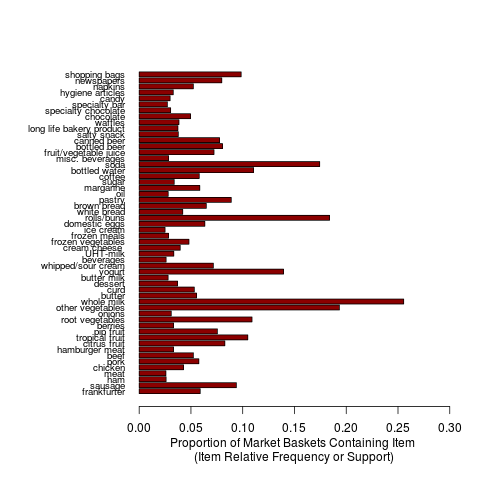

In [60]:
# examine frequency for each item with support greater than 0.025
#pdf(file="10_data/rel/fig_market_basket_initial_item_support.pdf", 
#  width = 8.5, height = 11)
itemFrequencyPlot(Groceries, support = 0.025, cex.names=0.8, xlim = c(0,0.3),
  type = "relative", horiz = TRUE, col = "dark red", las = 1,
  xlab = paste("Proportion of Market Baskets Containing Item",
    "\n(Item Relative Frequency or Support)"))
#dev.off()    

### 좀더 유사한 것끼리 묶자

In [62]:
# explore possibilities for combining similar items
print(head(itemInfo(Groceries))) 

             labels  level2           level1
1       frankfurter sausage meet and sausage
2           sausage sausage meet and sausage
3        liver loaf sausage meet and sausage
4               ham sausage meet and sausage
5              meat sausage meet and sausage
6 finished products sausage meet and sausage


In [63]:
print(levels(itemInfo(Groceries)[["level1"]]))  # 10 levels... too few 

 [1] "canned food"          "detergent"            "drinks"              
 [4] "fresh products"       "fruit and vegetables" "meet and sausage"    
 [7] "non-food"             "perfumery"            "processed food"      
[10] "snacks and candies"  


In [64]:
print(levels(itemInfo(Groceries)[["level2"]]))  # 55 distinct levels

 [1] "baby food"                       "bags"                           
 [3] "bakery improver"                 "bathroom cleaner"               
 [5] "beef"                            "beer"                           
 [7] "bread and backed goods"          "candy"                          
 [9] "canned fish"                     "canned fruit/vegetables"        
[11] "cheese"                          "chewing gum"                    
[13] "chocolate"                       "cleaner"                        
[15] "coffee"                          "condiments"                     
[17] "cosmetics"                       "dairy produce"                  
[19] "delicatessen"                    "dental care"                    
[21] "detergent/softener"              "eggs"                           
[23] "fish"                            "frozen foods"                   
[25] "fruit"                           "games/books/hobby"              
[27] "garden"                          "hair care" 

### level2로 묶자. 

In [65]:
# aggregate items using the 55 level2 levels for food categories
# to create a more meaningful set of items
groceries <- aggregate(Groceries, itemInfo(Groceries)[["level2"]])

In [66]:
print(dim(groceries)[1])  # 9835 market baskets for shopping trips

[1] 9835


In [67]:
print(dim(groceries)[2])  # 55 final store items (categories)

[1] 55


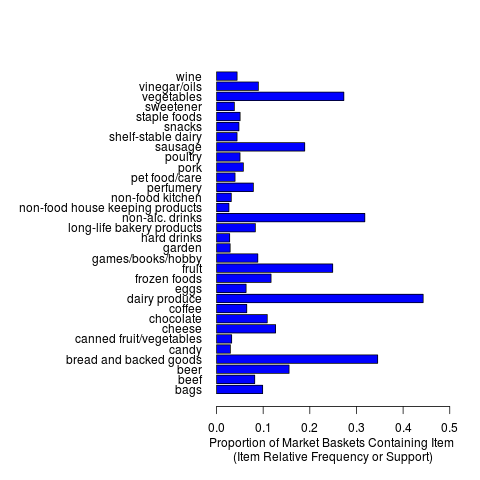

In [68]:
#pdf(file="10_data/rel/fig_market_basket_final_item_support.pdf", width = 8.5, height = 11)
itemFrequencyPlot(groceries, support = 0.025, cex.names=1.0, xlim = c(0,0.5),
  type = "relative", horiz = TRUE, col = "blue", las = 1,
  xlab = paste("Proportion of Market Baskets Containing Item",
    "\n(Item Relative Frequency or Support)"))
#dev.off()   

## 예측모델 만들기

### 지지도와 신뢰도를 조정하면서 탐색해보자

In [69]:
# obtain large set of association rules for items by category and all shoppers
# this is done by setting very low criteria for support and confidence
first.rules <- apriori(groceries, 
  parameter = list(support = 0.001, confidence = 0.05))
print(summary(first.rules))  # yields 69,921 rules... too many


Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
       0.05    0.1    1 none FALSE            TRUE   0.001      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[55 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [54 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.01s].
writing ... [69921 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].
Length  Class   Mode 
 69921  rules     S4 


In [70]:
# select association rules using thresholds for support and confidence 
second.rules <- apriori(groceries, 
  parameter = list(support = 0.025, confidence = 0.05))
print(summary(second.rules))  # yields 344 rules


Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
       0.05    0.1    1 none FALSE            TRUE   0.025      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[55 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [32 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [344 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Length  Class   Mode 
   344  rules     S4 


### 지지도, 신뢰도, 향상도(lift)의 상관관계를 살펴보자

* 향상도(lift)는 규칙(A=>B)로 결과사건 B를 예측한 신뢰도를, 규칙 (A=>B)없이 결과사건 B를 예측한 신뢰도로 나눈 값이다.
* 향상도는 연관성 규칙에서 해당 항목의 하위집합들이 독립에서 얼마나 벗어나있는지 정도를 측정하는 값이다.

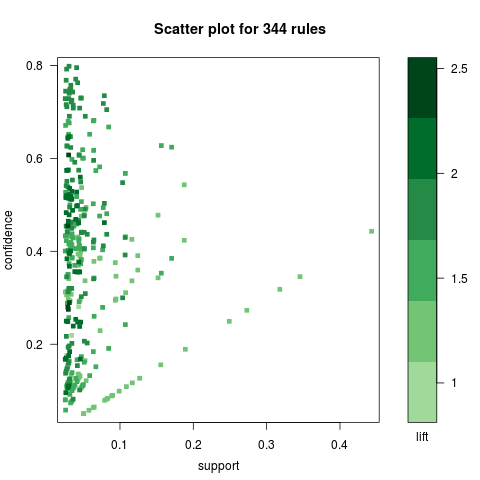

In [71]:
# data visualization of association rules in scatter plot
#pdf(file="10_data/rel/fig_market_basket_rules.pdf", width = 8.5, height = 8.5)
plot(second.rules, 
  control=list(jitter=2, col = rev(brewer.pal(9, "Greens")[4:9])),
  shading = "lift")   
#dev.off() 

### 매트릭스 버블 차트로 연관성 규칙을 도식화

* 선행발생 항목 또는 연관성 규칙의 왼쪽(LHS) 부분은 매트릭스 상단에 표시
* 후행발생 항목 또는 연솬성 규칙의 오른쪽(RHS) 부분은 매트릭스 오른쪽에 표시
* 지지도는 거품의 크기에 비례
* 신뢰도는 거품의 색 농도에 비례

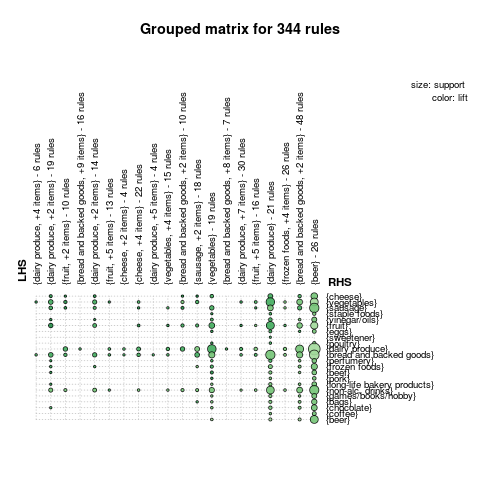

In [72]:
# grouped matrix of rules 
#pdf(file="10_data/rel/fig_market_basket_rules_matrix.pdf", width = 8.5, height = 8.5)
plot(second.rules, method="grouped",   
  control=list(col = rev(brewer.pal(9, "Greens")[4:9])))
#dev.off()    

## 연관성 분석 규칙 활용

### 지역농부를 위한 연관성 분석 규칙 탐색

* 우유와 함께 구매하는 상품이 무엇인가?

In [133]:
# select rules with vegetables in consequent (right-hand-side) item subsets
milk.rules<-apriori(data=Groceries, parameter=list(support = 0.025, confidence = 0.05), 
               appearance = list(default="lhs",rhs="whole milk"),
               control = list(verbose=F))
inspect(milk.rules)  # 19 rules

   lhs                        rhs             support confidence      lift
1  {}                      => {whole milk} 0.25551601  0.2555160 1.0000000
2  {curd}                  => {whole milk} 0.02613116  0.4904580 1.9194805
3  {brown bread}           => {whole milk} 0.02521607  0.3887147 1.5212930
4  {butter}                => {whole milk} 0.02755465  0.4972477 1.9460530
5  {newspapers}            => {whole milk} 0.02735130  0.3426752 1.3411103
6  {domestic eggs}         => {whole milk} 0.02999492  0.4727564 1.8502027
7  {fruit/vegetable juice} => {whole milk} 0.02663955  0.3684951 1.4421604
8  {whipped/sour cream}    => {whole milk} 0.03223183  0.4496454 1.7597542
9  {pip fruit}             => {whole milk} 0.03009659  0.3978495 1.5570432
10 {pastry}                => {whole milk} 0.03324860  0.3737143 1.4625865
11 {citrus fruit}          => {whole milk} 0.03050330  0.3685504 1.4423768
12 {sausage}               => {whole milk} 0.02989324  0.3181818 1.2452520
13 {bottled water}       

### 연관성 네트워크 그래프

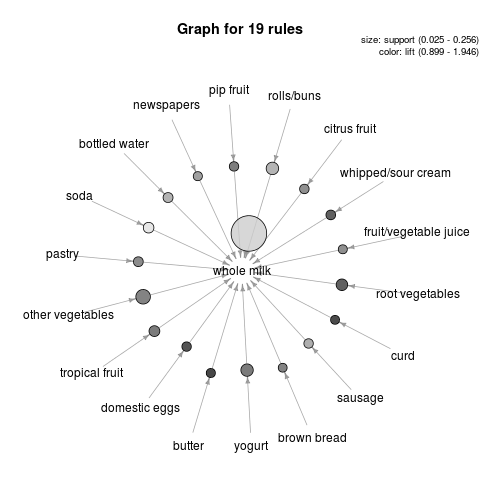

In [137]:
#pdf(file="10_data/rel/fig_market_basket_farmer_rules.pdf", width = 11, height = 8.5)
plot(milk.rules, method="graph", 
  control=list(type="items"), 
  shading = "lift")
#dev.off()  

## 분석결과 활용 

* 연관규칙에 대한 측정값을 검토할 때, 지지도가 상점 안의 다른 상품에 비해 낮다면 이 상품은 매장 주인에게 중요도가 매우 떨어진다.
* 시장바구니 분석을 수행하기 전에 군집 분석을 실행하여 시장바구니가 유사한 쇼핑객 그룹을 알아낸다. 이를 트랜잭션 군집분석이라고 한다. 이를 통해 교차판매, 공동마케팅이나 특정 고객 세그먼트를 대상으로 한 제품번들링 추천물을 개발할 수 있다.
* 연관규칙 분석은 예측보다는 현상에 대한 설명이다. 고객 쇼핑 패턴에 대한 실제 일어난 일들을 알아내려면 상점에 가봐야 한다.
* 마케터는 연관규칙을 사용하여 상점 배치, 물건 번들링, 교차판매에 대한 의사결정을 한다.
* 시장바구니 예측 모형의 타당성은 마케팅 반응이나 판매량에 근거하여 판단한다.

# 참고자료

* [1] 예측 분석 모델링 실무 기법 - http://www.acornpub.co.kr/book/predictive-analytics-modeling
* [2] 소스(원저자) - http://www.ftpress.com/promotions/modeling-techniques-in-predictive-analytics-139480
* [3] 소스(역자) - http://blog.naver.com/skk1991/220238139920
* [4] Market Basket Analysis with R - http://www.salemmarafi.com/code/market-basket-analysis-with-r/comment-page-1/